In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import best_model
from get_abs_sherpa_bxa import *
from get_abs_sherpa_bxa_alt import *
from get_abs_sherpa_bxa_restricted import *
from astropy.io import fits
from astropy.time import Time
import glob
from ciao_contrib.runtool import *
from astropy import units as u
from astropy.coordinates import SkyCoord
from sherpa.astro.ui import *

 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996


In [17]:
os.getcwd()

'/Users/kciurleo/Documents/kciurleo/AGN/sherpa_fitting_code'

 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996


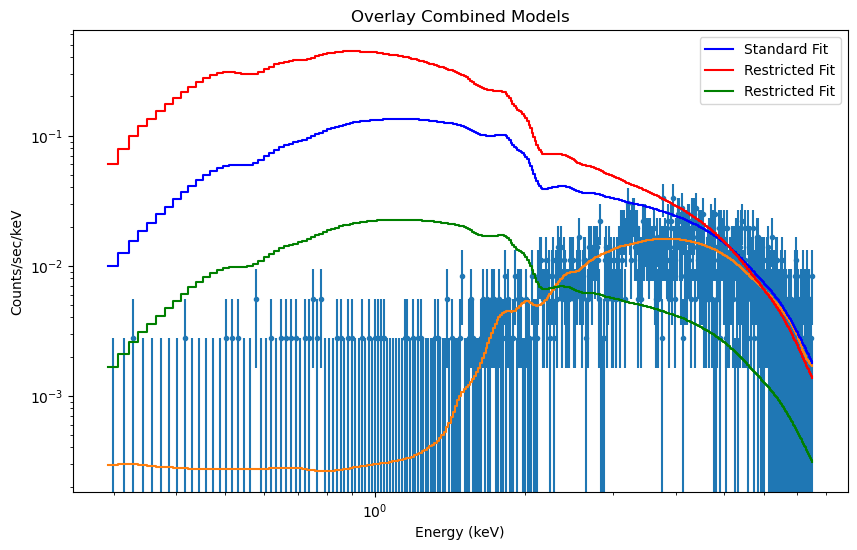

In [18]:
def load_fit_models(dir):
    # Load the saved sessions
    restore(f'{dir}/plotting_get_abs.save')
    normal_p1=p1

    restore(f'{dir}/plotting_get_abs_restricted.save')
    restricted_p1=p1

    restore(f'{dir}/plotting_get_abs_alt.save')
    alt_p1=p1

    return normal_p1, restricted_p1, alt_p1

standard_p1,  restricted_p1, alt_p1 = load_fit_models(base)


# Plotting
plt.figure(figsize=(10, 6))

plot_fit(xlog=True, ylog=True)
plot_model_component(standard_p1, overplot=True, label='Standard Fit', color='b')
plot_model_component(restricted_p1, overplot=True, label='Restricted Fit', color='r')
plot_model_component(alt_p1, overplot=True, label='Restricted Fit', color='g')

plt.title('Overlay Combined Models')
plt.legend(loc='best')
os.chdir('/Users/kciurleo/Documents/kciurleo/AGN/plots')
plt.savefig(f'{name}_models_comparison.png', dpi=300)
plt.show()

In [2]:
final_full = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_full.csv')
interest=final_full.loc[final_full['# ObsID']=='15078b'].head(1) #the one guy i downloaded
base='/opt/pwdata/katie/csc2.1/15078b/primary'
name=interest['CXO name'].iloc[0]
print(interest['nH'])

322    6.040427110522564
Name: nH, dtype: object


read ARF file /opt/pwdata/katie/csc2.1/15078b/primary/reextract_pha.corr.arf
read RMF file /opt/pwdata/katie/csc2.1/15078b/primary/reextract_pha.rmf
read ARF (background) file /opt/pwdata/katie/csc2.1/15078b/primary/reextract_pha_bkg.arf
read RMF (background) file /opt/pwdata/katie/csc2.1/15078b/primary/reextract_pha_bkg.rmf
read background file /opt/pwdata/katie/csc2.1/15078b/primary/reextract_pha_bkg.pi
dataset 1: 0.0073:14.9504 Energy (keV)
dataset 1: 0.0073:14.9504 -> 2.5112:14.9504 Energy (keV)
dataset 1: 2.5112:14.9504 -> 2.5112:6.9934 Energy (keV)
dataset 1: 2.5112:6.9934 -> 2.4966:7.008 Energy (keV)
'apply_rmf(apply_arf((24735.98890898 * (box1d.continuum_1 * const1d.contlevel_1))))'
for dataset 1 background 1
dataset 1: 2.4966:7.008 -> 2.5112:7.008 Energy (keV)
dataset 1: 2.5112:7.008 -> 2.5112:6.9934 Energy (keV)
dataset 1: 2.5112:6.9934 -> 2.4966:7.008 Energy (keV)
dataset 1: 2.4966:7.008 Energy (keV) (unchanged)
dataset 1: 2.4966:7.008 Energy (keV) -> no data
dataset 1: no d

/opt/anaconda3/envs/ciao-4.16/lib/python3.11/site-packages/sherpa/models/parameter.py:358: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  val = SherpaFloat(val)


dataset 1: 9.5046:9.9134 Energy (keV) (unchanged)
dataset 1: 9.5046:9.9134 -> 9.5046:9.7966 Energy (keV)
dataset 1: 9.5046:9.7966 -> 0.3942:9.8112 Energy (keV)
'apply_rmf(apply_arf((24735.98890898 * (((((((box1d.continuum_1 * const1d.contlevel_1) + (((gauss1d.softend_1 * const1d.softlevel_1) + (gauss1d.softsoftend_1 * const1d.softsoftlevel_1)) * const1d.contlevel_1)) + (gauss1d.line1_1 * const1d.contlevel_1)) + (gauss1d.line2_1 * const1d.contlevel_1)) + (gauss1d.line3_1 * const1d.contlevel_1)) + (gauss1d.line4_1 * const1d.contlevel_1)) + (gauss1d.line8_1 * const1d.contlevel_1)))))'
for dataset 1 background 1
dataset 1: 0.3942:9.8112 -> 7.8256:9.8112 Energy (keV)
dataset 1: 7.8256:9.8112 -> 7.8256:8.2052 Energy (keV)
dataset 1: 7.8256:8.2052 -> 7.811:8.2198 Energy (keV)
'apply_rmf(apply_arf((24735.98890898 * ((((((((box1d.continuum_1 * const1d.contlevel_1) + (((gauss1d.softend_1 * const1d.softlevel_1) + (gauss1d.softsoftend_1 * const1d.softsoftlevel_1)) * const1d.contlevel_1)) + (gauss1

/Users/kciurleo/Documents/kciurleo/AGN/sherpa_fitting_code/get_abs_sherpa_bxa.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)


Dataset               = 1
Statistic             = cstat
Fit statistic value   = 578.701
Data points           = 494
Degrees of freedom    = 491
Probability [Q-value] = 0.00381011
Reduced statistic     = 1.17862

Background 1 in Dataset = 1
Statistic             = cstat
Fit statistic value   = 252.491
Data points           = 494
Degrees of freedom    = 494
Probability [Q-value] = 1
Reduced statistic     = 0.511116

Dataset               = 1
Statistic             = cstat
Fit statistic value   = 831.192
Data points           = 988
Degrees of freedom    = 985
Probability [Q-value] = 0.999868
Reduced statistic     = 0.843849
dataset 1: 0.292:7.5044 Energy (keV)
Dataset               = 1
Confidence Method     = covariance
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = cstat
covariance 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   abs2.nH        0.00365023        

/opt/anaconda3/envs/ciao-4.16/lib/python3.11/site-packages/sherpa/models/parameter.py:358: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  val = SherpaFloat(val)


dataset 1: 8.3074:9.8112 -> 8.3074:8.687 Energy (keV)
dataset 1: 8.3074:8.687 -> 8.2928:8.7016 Energy (keV)
'apply_rmf(apply_arf((24735.98890898 * ((((((((((box1d.continuum_1 * const1d.contlevel_1) + (((gauss1d.softend_1 * const1d.softlevel_1) + (gauss1d.softsoftend_1 * const1d.softsoftlevel_1)) * const1d.contlevel_1)) + (gauss1d.line1_1 * const1d.contlevel_1)) + (gauss1d.line2_1 * const1d.contlevel_1)) + (gauss1d.line3_1 * const1d.contlevel_1)) + (gauss1d.line4_1 * const1d.contlevel_1)) + (gauss1d.line8_1 * const1d.contlevel_1)) + (gauss1d.line5_1 * const1d.contlevel_1)) + (gauss1d.line6_1 * const1d.contlevel_1)) + (gauss1d.line7_1 * const1d.contlevel_1)))))'
for dataset 1 background 1
dataset 1: 8.2928:8.7016 Energy (keV) (unchanged)
dataset 1: 8.2928:8.7016 Energy (keV) -> no data
dataset 1: no data -> 2.4966:7.008 Energy (keV)
dataset 1: 2.4966:7.008 Energy (keV) (unchanged)
dataset 1: 2.4966:7.008 Energy (keV) -> no data
dataset 1: no data -> 0.3942:2.0002 Energy (keV)
'apply_rmf(

/opt/anaconda3/envs/ciao-4.16/lib/python3.11/site-packages/sherpa/models/parameter.py:358: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  val = SherpaFloat(val)


dataset 1: 8.2928:8.7016 Energy (keV) -> no data
dataset 1: no data -> 2.4966:7.008 Energy (keV)
dataset 1: 2.4966:7.008 Energy (keV) (unchanged)
dataset 1: 2.4966:7.008 Energy (keV) -> no data
dataset 1: no data -> 0.3942:2.0002 Energy (keV)
'apply_rmf(apply_arf((24735.98890898 * ((box1d.continuum_1 * const1d.contlevel_1) + (((gauss1d.softend_1 * const1d.softlevel_1) + (gauss1d.softsoftend_1 * const1d.softsoftlevel_1)) * const1d.contlevel_1)))))'
for dataset 1 background 1
'apply_rmf(apply_arf((24735.98890898 * (((box1d.continuum_1 * const1d.contlevel_1) + (((gauss1d.softend_1 * const1d.softlevel_1) + (gauss1d.softsoftend_1 * const1d.softsoftlevel_1)) * const1d.contlevel_1)) + (gauss1d.line1_1 * const1d.contlevel_1)))))'
for dataset 1 background 1
'apply_rmf(apply_arf((24735.98890898 * ((((box1d.continuum_1 * const1d.contlevel_1) + (((gauss1d.softend_1 * const1d.softlevel_1) + (gauss1d.softsoftend_1 * const1d.softsoftlevel_1)) * const1d.contlevel_1)) + (gauss1d.line1_1 * const1d.contl

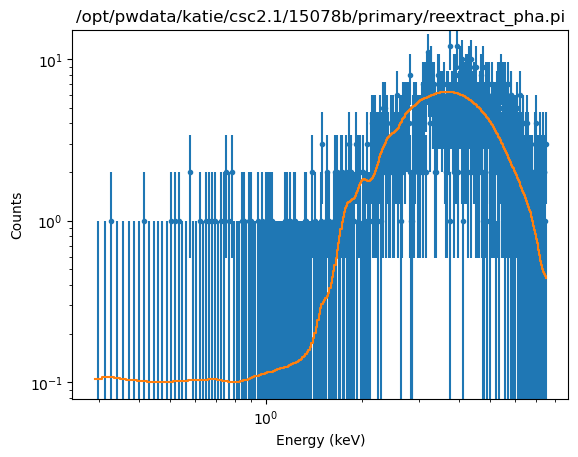

In [3]:
get_abs(interest['nH'],interest['Z'],base, name)
get_abs_alt(interest['nH'],interest['Z'],base)
get_abs_restricted(interest['nH'],interest['Z'],base)

In [47]:
#Errors
match_error = pd.read_csv('/opt/pwdata/katie/csc2.1/matching_error.txt', skiprows=1, names=['ids', 'date', 'exp', 'theta'])
fit_error = pd.read_csv('/opt/pwdata/katie/csc2.1/fitting_error.txt', skiprows=1, names=['ids'])
wav_error = pd.read_csv('/opt/pwdata/katie/csc2.1/wavdetect_error.txt', skiprows=1, names=['ids'])

#Other
stats =  pd.read_csv('/opt/pwdata/katie/csc2.1/stats.csv')
compton = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_compton_list.txt', skiprows=1, names=['ids'])
triply_unabsorbed_list = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/triply_unabsorbed_list.txt', skiprows=1, names=['ids'])

final_list=pd.read_csv('/opt/pwdata/katie/csc2.1/data_full.txt', skiprows=1, delimiter='  ',names=['NAME','OBSID','RA', 'DEC', 'Z', 'nH', 'COUNTS'])
final_min_abs = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_min_abs_full.csv')
final_full = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_full.csv')

#from before for bpt
full_point_sources=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/full_point_sources.csv')

/var/folders/k6/tsv820sn5p716ph672hyrv8c004djp/T/ipykernel_75319/990920465.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  final_list=pd.read_csv('/opt/pwdata/katie/csc2.1/data_full.txt', skiprows=1, delimiter='  ',names=['NAME','OBSID','RA', 'DEC', 'Z', 'nH', 'COUNTS'])


In [48]:
#Get total repositories, tells us how many combos of obsid and target there are
total = [file for file in os.listdir('/opt/pwdata/katie/csc2.1') if not file.startswith('._')]
total = set([entry for entry in total if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1', entry))])

In [49]:
#Check compton thick in all different versions
main = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio.csv')
main_compton = set(main.loc[main['compton thick']=='True']['# ObsID'])
res = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio_res.csv')
res_compton = set(res.loc[res['compton thick']=='True']['# ObsID'])
alt = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio_alt.csv')
alt_compton = set(alt.loc[alt['compton thick']=='True']['# ObsID'])

In [50]:
#Get lists of the repositories put in all the different spots
final_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/final_data') if not file.startswith('._')]
final_reps = set([entry for entry in final_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/final_data', entry))])
main_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs') if not file.startswith('._')]
main_reps = set([entry for entry in main_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs', entry))])
alt_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs_alt') if not file.startswith('._')]
alt_reps = set([entry for entry in alt_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs_alt', entry))])
res_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs_res') if not file.startswith('._')]
res_reps = set([entry for entry in res_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs_res', entry))])

In [51]:
#Printing out stuff
print(f"Ran code for {len(total)} obsid-object combos")
print(f"Wavdetect errors: {len(wav_error)}")
print(f"Match region errors: {len(match_error)}")
print(f"Sherpa fitting errors: {len(fit_error)}")
print()
print(f"Compton thick candidates in 'best' model: {len(compton)}")
print(f"Main Compton thick candidates: {len(main_compton)}")
print(f"Alt Compton thick candidates: {len(alt_compton)}")
print(f"Res Compton thick candidates: {len(res_compton)}")
print(f"Compton thick in at least one model: {len(main_compton | alt_compton | res_compton)}")
print()
print(f'Total "best" min abs using my current best model method: {len(final_reps)}')
print(f'Total main fit min abs: {len(main_reps)}')
print(f'Total alt fit min abs: {len(alt_reps)}')
print(f'Total res fit min abs: {len(res_reps)}')
print(f'Total min abs in at least one fit: {len(main_reps | alt_reps | res_reps )}')
print(f"Triply unabsorbed: {len(triply_unabsorbed_list)}")

Ran code for 2012 obsid-object combos
Wavdetect errors: 54
Match region errors: 942
Sherpa fitting errors: 118

Compton thick candidates in 'best' model: 57
Main Compton thick candidates: 49
Alt Compton thick candidates: 46
Res Compton thick candidates: 56
Compton thick in at least one model: 61

Total "best" min abs using my current best model method: 115
Total main fit min abs: 257
Total alt fit min abs: 70
Total res fit min abs: 106
Total min abs in at least one fit: 268
Triply unabsorbed: 25


In [66]:
set(final_full['model'].values)

{'ERROR', 'alt', 'main', 'res'}

Index(['# ObsID', 'Cstat', 'nH', 'nH error plus', 'nH error minus', 'gamma',
       'gamma error plus', 'gamma error minus', '0.3-7.5 flux',
       'xflux error plus', 'xflux_error_minus', '2-10 flux',
       'flux210 error plus', 'flux210 error minus', 'Soft flux',
       'fluxsoft error plus', 'fluxsoft error minus', 'Medium flux',
       'fluxmed error plus', 'fluxmed error minus', 'Hard flux',
       'fluxhard error plus', 'fluxhard error minus', 'Sum flux',
       'fluxsum error plus', 'fluxsum error minus', 'Test Statistic', 'Ce',
       'Cv', 'CXO name', 'RA', 'Dec', 'Z', 'galactic nH', 'counts',
       'luminosity', 'luminosity error', 'Flux_OIII_5006',
       'Flux_OIII_5006_err', 'Fx/F[OIII]', 'Fx/F[OIII].1', 'compton thick'],
      dtype='object')


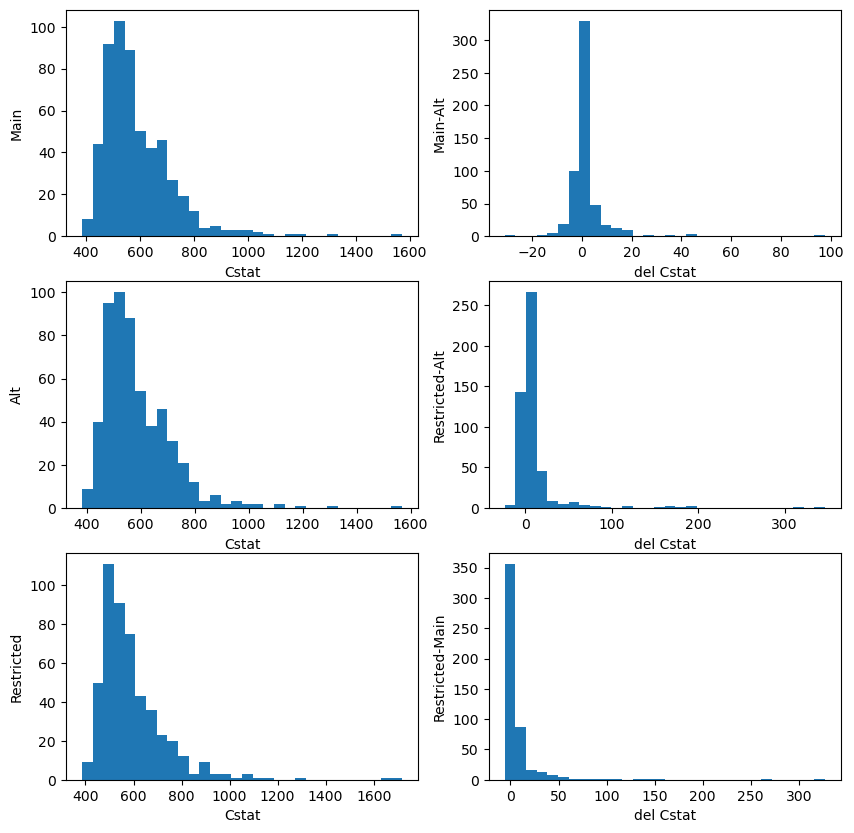

In [67]:
#Get some histograms to determine where our best model cutoff should be
%matplotlib inline
best_model.make_histograms('/opt/pwdata/katie/csc2.1', 30, 30)

In [55]:
#get the exposure time and date for all the match errors
dates = []
exps = []
thetas = []
problem_list = []

for number, row in match_error.iterrows():
    #exp time and date from header
    #print(row['ids'])
    try:
        file = glob.glob(f'/opt/pwdata/katie/csc2.1/{row["ids"]}/primary/*evt2*')[0]
    except:
        dates.append(np.nan)
        exps.append(np.nan)
        thetas.append(np.nan)
        problem_list.append(row['ids'])
        continue

    hdr = fits.getheader(file,ext=1)
    dates.append(hdr['DATE-OBS'])
    exps.append(hdr['EXPOSURE'])

    #off axis angle from ciao tool
    temprow=final_list.loc[final_list['OBSID']==f'{row["ids"]}']
    dmcoords.punlearn()
    dmcoords(file, option='cel', ra=list(temprow['RA'])[0], dec=list(temprow['DEC'])[0])
    thetas.append(dmcoords.theta)


match_error['date'] = dates
match_error['exp'] = exps
match_error['theta'] = thetas

In [56]:
print(problem_list)

[]


In [57]:
mjds=[]
for i in range(len(match_error['date'])):
    try:
        mjds.append(Time(match_error['date'][i]).mjd)
    except:
        mjds.append(np.nan)

In [60]:
# What about for the whole population?

#get the exposure time and date for all the match errors
dates_full = []
exps_full = []
thetas_full = []
problem_list_full = []

for number, row in final_list.iterrows():
    #exp time and date from header
    #print(row['ids'])
    try:
        file = glob.glob(f'/opt/pwdata/katie/csc2.1/{row["OBSID"]}/primary/*evt2*')[0]
    except:
        dates_full.append(np.nan)
        exps_full.append(np.nan)
        thetas_full.append(np.nan)
        problem_list_full.append(row['OBSID'])
        continue

    hdr = fits.getheader(file,ext=1)
    dates_full.append(hdr['DATE-OBS'])
    exps_full.append(hdr['EXPOSURE'])

    #off axis angle from ciao tool
    dmcoords.punlearn()
    dmcoords(file, option='cel', ra=row['RA'], dec=row['DEC'])
    thetas_full.append(dmcoords.theta)


final_list['date'] = dates_full
final_list['exp'] = exps_full
final_list['theta'] = thetas_full

In [61]:
print(problem_list_full)

['25467', '25741', '25742', '25743', '25744', '25745', '25746', '25747', '25748', '25749', '25750', '25751', '25752', '25753', '25754', '25755', '25756', '25757', '25758', '26255', '26287', '27630', '27631', '27632', '27633', '27652', '28933', '28163', '28163b', '25765', '25766', '25495', '27107', '27108', '26676', '29366', '26724', '26721']


In [62]:
final_mjds=[]
for i in range(len(final_list['date'])):
    try:
        final_mjds.append(Time(final_list['date'][i]).mjd)
    except:
        final_mjds.append(np.nan)

In [63]:
final_list

,NAME,OBSID,RA,DEC,Z,nH,COUNTS,date,exp,theta
0,2CXO J000002.2+003739,11591,0.009498,0.627583,0.248428,0.0277,34,2009-08-13T13:56:38,23719.527217,5.136982
1,2CXO J000004.7+004654,11591b,0.019778,0.781756,0.080386,0.0274,72,2009-08-13T13:56:38,23719.527217,4.534338
2,2CXO J000111.1-100155,11439,0.296487,-10.032184,0.048908,0.0316,26,2009-10-14T03:26:45,1969.889235,0.143881
3,2CXO J000547.5-000116,5617,1.448048,-0.021204,0.365594,0.0308,27,2005-07-28T12:58:02,16931.105642,5.297918
4,2CXO J000737.3+020247,4828,1.905625,2.046459,0.497282,0.0282,11,2003-11-09T03:11:58,5535.141960,3.869041
...,...,...,...,...,...,...,...,...,...,...
1889,2CXO J235707.4-005711,6129,359.281264,-0.953223,0.536461,0.0305,23,2004-09-21T10:56:30,19256.469158,4.792286
1890,2CXO J235720.1-005829,6128b,359.333916,-0.974908,0.339078,0.0305,193,2004-09-15T21:57:41,17931.545480,7.040326
1891,2CXO J235720.1-005829,6129b,359.333916,-0.974908,0.339078,0.0305,156,2004-09-21T10:56:30,19256.469158,7.226678
1892,2CXO J235735.2+004901,18636,359.396726,0.817208,0.110205,0.0310,45,2016-08-13T06:03:57,9927.680672,2.448364


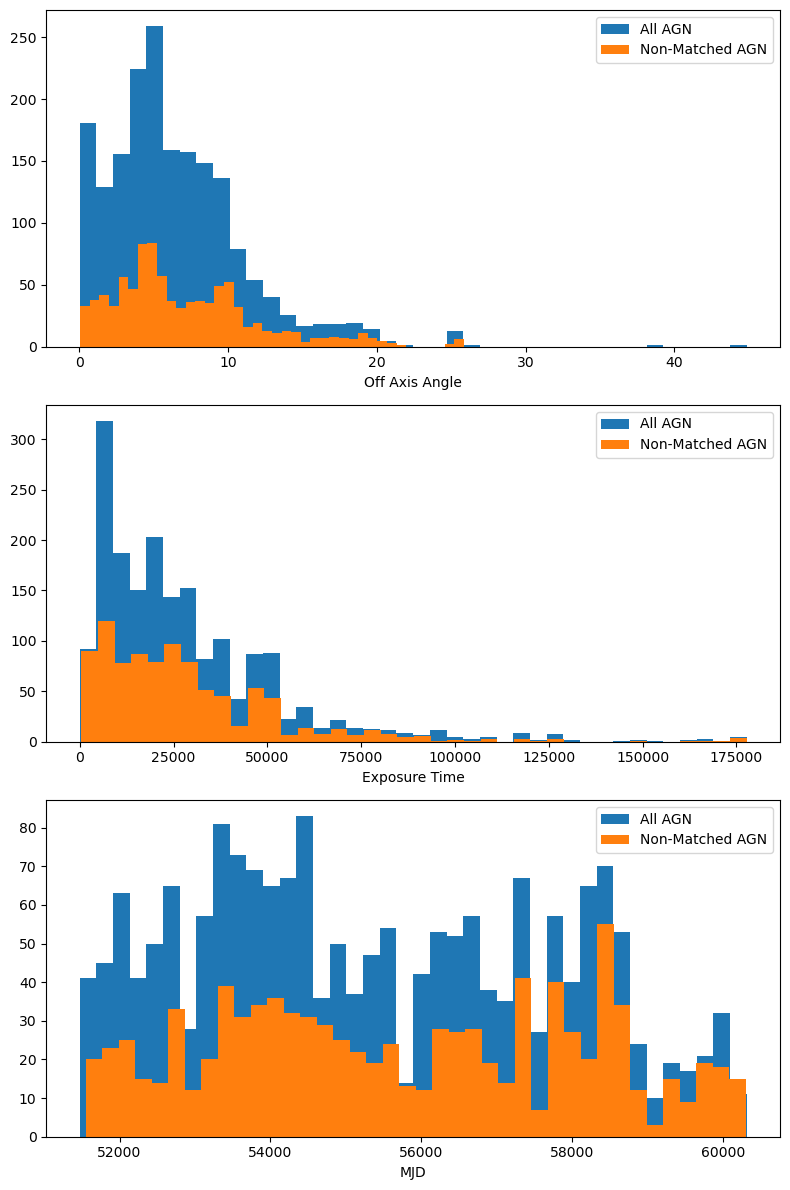

In [64]:

fig, axs = plt.subplots(3, 1, figsize=[8, 12])

axs[0].hist(final_list['theta'], bins=40, label='All AGN')
axs[0].hist(match_error['theta'], bins=40, label='Non-Matched AGN')
axs[0].set_xlabel('Off Axis Angle')
axs[0].legend()

axs[1].hist(final_list['exp'], bins=40, label='All AGN')
axs[1].hist(match_error['exp'], bins=40, label='Non-Matched AGN')
axs[1].set_xlabel('Exposure Time')
axs[1].legend()

axs[2].hist(final_mjds, bins=40, label='All AGN') 
axs[2].hist(mjds, bins=40, label='Non-Matched AGN')
axs[2].set_xlabel('MJD')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [65]:
visual_match_error = pd.DataFrame(columns=final_list.columns)
for obsid in match_error.head(30)['ids']:
    temp_row_dude=final_list.loc[final_list['OBSID']==f'{obsid}']
    coord=SkyCoord(ra=list(temp_row_dude['RA'])[0]*u.deg, dec=list(temp_row_dude['DEC'])[0]*u.deg)
    ra_hms = coord.ra.to_string(unit=u.hourangle, sep=':', precision=2)
    dec_dms = coord.dec.to_string(sep=':', precision=2)
    visual_match_error = pd.concat([visual_match_error, temp_row_dude], ignore_index=True)

/var/folders/k6/tsv820sn5p716ph672hyrv8c004djp/T/ipykernel_2149/2510164994.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  visual_match_error = pd.concat([visual_match_error, temp_row_dude], ignore_index=True)


In [66]:
#visual_match_error.to_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/visual_match_error.csv')
visual_match_error

,NAME,OBSID,RA,DEC,Z,nH,COUNTS,date,exp,theta
0,2CXO J000737.3+020247,19586,1.905625,2.046459,0.497282,0.0282,NO MATCH,2017-08-19T10:09:46,18803.663899,7.662407
1,2CXO J001132.6-071952,10342,2.886157,-7.331181,0.307793,0.0275,NO MATCH,2008-11-01T17:11:09,14985.412034,3.468283
2,2CXO J002232.9+001630,2252,5.637303,0.275024,0.105987,0.0256,NO MATCH,2001-01-06T11:36:05,71220.950418,4.113190
3,2CXO J002729.8+050354,2579,6.874425,5.065156,0.570946,0.0247,NO MATCH,2001-12-07T23:08:52,66350.671516,3.127610
4,2CXO J004112.9+253347,7608,10.304085,25.563107,0.434847,0.0339,NO MATCH,2007-07-11T15:44:25,3001.505678,5.010266
5,2CXO J004112.9+253347,27884,10.304085,25.563107,0.434847,0.0339,NO MATCH,2023-06-05T20:55:28,14618.273041,16.008866
6,2CXO J004127.2+252616,7608c,10.363532,25.437906,0.146131,0.0327,NO MATCH,2007-07-11T15:44:25,3001.505678,3.635518
7,2CXO J004518.9-022327,26139,11.329052,-2.390945,0.487726,0.0264,NO MATCH,2021-10-02T20:43:06,9949.481777,3.285991
8,2CXO J005051.6-010551,9224,12.715067,-1.097564,0.550291,0.0345,NO MATCH,2008-05-26T06:26:35,3576.551106,4.207272
9,2CXO J010101.1-002444,8259,15.254616,-0.412405,0.096668,0.0307,NO MATCH,2008-02-09T01:52:30,16808.492195,0.132060


In [67]:
radii = []
for id, row in visual_match_error.iterrows():
    if row["theta"] <= 1:
        radius = 1
    else:
        radius = row["theta"]
    radii.append(radius)

visual_match_error['radius'] = radii

In [68]:
match_error

,ids,date,exp,theta
0,19586,2017-08-19T10:09:46,18803.663899,7.662407
1,10342,2008-11-01T17:11:09,14985.412034,3.468283
2,2252,2001-01-06T11:36:05,71220.950418,4.113190
3,2579,2001-12-07T23:08:52,66350.671516,3.127610
4,7608,2007-07-11T15:44:25,3001.505678,5.010266
...,...,...,...,...
935,17170b,2015-11-05T19:59:23,25386.043129,2.416443
936,17490b,2015-01-20T06:55:15,118433.016490,0.830656
937,18702b,2015-11-15T08:23:00,24634.463379,2.427963
938,18703b,2016-01-14T17:39:47,25610.742613,2.608989


In [23]:
csc21=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/obsids_seyferts.csv', low_memory=False)

In [24]:
csc21

,CSC21P_name,ra_x,dec_x,likelihood_class,extent_flag,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,flux_aper_b,...,mjd_first,mjd_last,n_detections,confused,high_background,XMM_ra,XMM_dec,CHANDRA_OBSID,OBSDATE,TIME
0,2CXO J000002.2+003739,0.009498,0.627583,TRUE,False,1.798867,1.079022,107.781279,4.000000,2.624562e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11591,2009-08-13,23.7
1,2CXO J000004.7+004654,0.019778,0.781756,TRUE,False,0.945077,0.882179,42.936712,5.142857,2.481202e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11591,2009-08-13,23.7
2,2CXO J000111.1-100155,0.296487,-10.032184,TRUE,False,0.738174,0.730364,95.067257,4.125000,8.052680e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11439,2009-10-14,2.0
3,2CXO J000547.5-000116,1.448048,-0.021204,TRUE,False,2.074689,1.179905,18.380538,3.352941,1.455915e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5617,2005-07-28,16.9
4,2CXO J000737.3+020247,1.905625,2.046459,TRUE,False,1.997384,1.358077,155.522196,2.631579,1.192739e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828,2003-11-09,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,2CXO J235707.4-005711,359.281264,-0.953223,TRUE,False,0.973973,0.857201,75.739775,5.548387,2.635144e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6129,2004-09-21,19.3
2288,2CXO J235720.1-005829,359.333916,-0.974908,TRUE,False,0.810391,0.755359,81.777545,16.170926,8.609062e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6128,2004-09-15,17.9
2289,2CXO J235720.1-005829,359.333916,-0.974908,TRUE,False,0.810391,0.755359,81.777545,16.170926,8.609062e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6129,2004-09-21,19.3
2290,2CXO J235735.2+004901,359.396726,0.817208,TRUE,False,0.818117,0.748373,156.500651,4.833333,5.186270e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18636,2016-08-13,9.9


In [76]:
csc20_guys=0
for id in match_error['ids']:
    if id[-1] in ['a','b','c','d','e','f','g']:
        id = id[:-1]
    table=csc21.loc[csc21['CHANDRA_OBSID']==int(id)]
    for i in table['csc2.1_flag']:
        if i == False:
            csc20_guys+=1
            break
print(len(match_error['ids'].unique()))
print(csc20_guys)

940
232


In [77]:
csc20_guys=0
for id in final_list['OBSID']:
    if id[-1] in ['a','b','c','d','e','f','g']:
        id = id[:-1]
    table=csc21.loc[csc21['CHANDRA_OBSID']==int(id)]
    for i in table['csc2.1_flag']:
        if i == False:
            csc20_guys+=1
            break
print(len(final_list['OBSID'].unique()))
print(csc20_guys)

1894
354


In [96]:
testing = visual_match_error.drop(0).reset_index(drop=True)
#testing.to_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/visual_match_error.csv')

In [99]:
for number, row in testing.iterrows():
    #exp time and date from header
    #print(row['ids'])
    try:
        thefile = glob.glob(f'/opt/pwdata/katie/csc2.1/{row["OBSID"]}/primary/*evt2*')[0]
    except:
        continue
    
    os.chdir(f'/opt/pwdata/katie/csc2.1/{row["OBSID"]}/primary')
    
    print('writing reg files for ',row["OBSID"])
    
    srcfile = 'testsrc.reg'
    bkgfile = 'testbkg.reg'

    with open(srcfile, 'w') as file:
        file.write(f'circle({row["RA"]}d,{row["DEC"]}d,{row["radius"]}\")')

    with open(bkgfile, 'w') as file:
        file.write(f'annulus({row["RA"]}d,{row["DEC"]}d,{row["radius"]}\",{1.5*row["radius"]}\")')

    print('srcfluxing ',row["OBSID"])
    srcflux.punlearn()
    srcflux(f'{thefile}[energy=300:7500]', pos=f'{row["RA"]}, {row["DEC"]}', srcreg=srcfile, bkgreg=bkgfile, outroot=f"/opt/pwdata/katie/csc2.1/{row['OBSID']}/primary/counts/", psfmethod="quick", clobber="yes") 

    print('srcfluxed ', row["OBSID"])

writing reg files for  10342
srcfluxing  10342
srcfluxed  10342
10342  has  [9.]  counts
writing reg files for  2252
srcfluxing  2252


srcfluxed  2252
2252  has  [9.]  counts
writing reg files for  2579
srcfluxing  2579


srcfluxed  2579
2579  has  [17.]  counts
writing reg files for  7608
srcfluxing  7608


srcfluxed  7608
7608  has  nan  counts
writing reg files for  27884
srcfluxing  27884
srcfluxed  27884
27884  has  nan  counts
writing reg files for  7608c
srcfluxing  7608c
srcfluxed  7608c
7608c  has  nan  counts
writing reg files for  26139
srcfluxing  26139
srcfluxed  26139
26139  has  nan  counts
writing reg files for  9224
srcfluxing  9224
srcfluxed  9224
9224  has  nan  counts
writing reg files for  8259
srcfluxing  8259
srcfluxed  8259
8259  has  nan  counts
writing reg files for  4832
srcfluxing  4832
srcfluxed  4832
4832  has  nan  counts
writing reg files for  7748
srcfluxing  7748
srcfluxed  7748
7748  has  nan  counts
writing reg files for  15597
srcfluxing  15597
srcfluxed  15597
15597  has  nan  counts
writing reg files for  4129
srcfluxing  4129
srcfluxed  4129
4129  has  nan  counts
writing reg files for  4402
srcfluxing  4402
srcfluxed  4402
4402  has  nan  counts
writing reg files for  16575
srcfluxing  16575
srcfluxed  16575
16575  has  nan  counts
writing reg files

In [106]:
counts = []
for number, row in testing.iterrows():
    #exp time and date from header
    #print(row['ids'])
    try:
        thefile = glob.glob(f'/opt/pwdata/katie/csc2.1/{row["OBSID"]}/primary/*evt2*')[0]
    except:
        continue
    
    os.chdir(f'/opt/pwdata/katie/csc2.1/{row["OBSID"]}/primary')
    
    print('looking at ', row["OBSID"])
    try:
        count = fits.getdata(f'/opt/pwdata/katie/csc2.1/{row["OBSID"]}/primary/counts/broad.flux')['COUNTS'][0]
    except:
        try:
            count = fits.getdata(f'/opt/pwdata/katie/csc2.1/{row["OBSID"]}/primary/counts/_broad.flux')['COUNTS'][0]
        except:
            count = np.nan
    
    print(row["OBSID"],' has ',count,' counts')
    counts.append(count)

testing['counts']=counts

looking at  10342
10342  has  9.0  counts
looking at  2252
2252  has  9.0  counts
looking at  2579
2579  has  17.0  counts
looking at  7608
7608  has  8.0  counts
looking at  27884
27884  has  0.0  counts
looking at  7608c
7608c  has  6.0  counts
looking at  26139
26139  has  4.0  counts
looking at  9224
9224  has  3.0  counts
looking at  8259
8259  has  8.0  counts
looking at  4832


4832  has  4.0  counts
looking at  7748
7748  has  4.0  counts
looking at  15597
15597  has  9.0  counts
looking at  4129
4129  has  38.0  counts
looking at  4402
4402  has  5.0  counts
looking at  16575
16575  has  10.0  counts
looking at  20457
20457  has  0.0  counts
looking at  22027
22027  has  0.0  counts
looking at  9223
9223  has  8.0  counts
looking at  6820
6820  has  0.0  counts
looking at  17078
17078  has  15.0  counts
looking at  2081
2081  has  6.0  counts
looking at  22599
22599  has  13.0  counts
looking at  17287
17287  has  12.0  counts
looking at  17292
17292  has  17.0  counts
looking at  17297
17297  has  0.0  counts
looking at  17287b
17287b  has  0.0  counts
looking at  17292b
17292b  has  0.0  counts
looking at  17296
17296  has  66.0  counts
looking at  17298
17298  has  0.0  counts


Text(0.5, 0, 'counts')

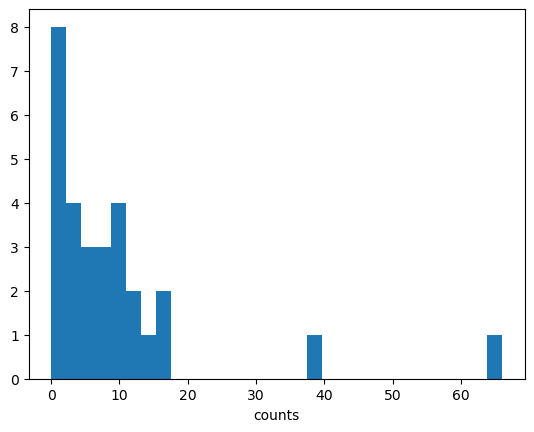

In [113]:
plt.hist(testing['counts'], bins=30)
plt.xlabel('counts')

In [39]:
obsids=final_list.loc[final_list['COUNTS']!='NO MATCH']["OBSID"]


In [44]:
output=best_model.get_best_model('/opt/pwdata/katie/csc2.1','/opt/pwdata/katie/csc2.1',obsids)

TypeError: get_best_model() takes 2 positional arguments but 3 were given

In [45]:
best_model.get_best_model?


Signature: best_model.get_best_model(data_dir, obsids)
Docstring: <no docstring>
File:      ~/Documents/kciurleo/AGN/sherpa_fitting_code/best_model.py
Type:      function